In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from functools import lru_cache

In [2]:
news = pd.read_csv("C:/Users/User/Documents/Datasets/news.csv")
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
news.rename(columns={"Unnamed: 0":"id"},inplace=True)

news.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
news.isna().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
news.shape

(6335, 4)

In [7]:
news["label"].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

### Data Pre-processing
# Text Cleansing

In [8]:
news['combined'] = news['title'] + ' ' + news['text']

# Prepare data for feature extraction and modeling
X = news['combined']
Y = news['label']

In [9]:
def clean(text):
    #Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    #Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    #Remove email addresses
    text = re.sub(r'\b[\w.-]+@[\w.-]+\.\w{2,}\b', '', text)
    #Remove numbers
    text = re.sub(r'\d+', '', text)
    #Remove punctuation
    text = re.sub(r'[`\u2013\u2026\\—]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = text.replace('’', ' ').replace("'", ' ').replace('‘',' ')
    #Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    #text = ' '.join(text)
    return text

In [10]:
# Initialize stemmer, stop words, and regex pattern
stemmer = PorterStemmer()
nltk.download('stopwords')
STOP_WORDS = set(stopwords.words('english'))
REGEX_PATTERN = re.compile('[^a-zA-Z]')

@lru_cache(maxsize=10000)
def cached_stem(word):
    """Stems a single word using the cached stemmer."""
    return stemmer.stem(word)

def stemming(content):
    """Preprocesses text content."""
    stemmed_content = REGEX_PATTERN.sub(' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = [cached_stem(word) for word in stemmed_content.split() if word not in STOP_WORDS]
    return ' '.join(stemmed_content)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def preprocess_pipeline(text):
    raw_cleaned = clean(text)            # From Function 1
    processed = stemming(raw_cleaned)    # From Function 2
    return processed

# Apply preprocessing pipeline to your 'title' column (or whichever one holds your text)
news['cleaned_data'] = news['combined'].apply(preprocess_pipeline)

news["cleaned_data"]

news

,id,title,text,label,combined,cleaned_data
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillari fear daniel greenfield shillman ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan commit polit suic...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,kerri go pari gestur sympathi us secretari sta...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,berni support twitter erupt anger dnc tri warn...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,battl new york primari matter primari day new ...
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...,state depart say cant find email clinton speci...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,p pb stand plutocrat pentagon p pb stand pluto...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...,antitrump protest tool oligarchi inform antitr...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se...",ethiopia obama seek progress peac secur east a...


# Modeling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC


X = news["cleaned_data"]
y = news["label"]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Fit on training data
y_test = le.transform(y_test)      # Transform test data

In [14]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, stop_words='english')

# Fit and transform on training data, transform on test data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [15]:
models = {
    "LogisticRegression": LogisticRegression(n_jobs=-1),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "SGDClassifier": SGDClassifier(),
    "MultinomialNB": MultinomialNB(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    
    "SVC": SVC(),
    "LinearSVC": LinearSVC(),
    
    
}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: test labels
    y_train: training data (no labels)
    y_test: test labels
   
    """
    
    
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        #Fit the model to the data 
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    return model_scores

In [16]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'LogisticRegression': 0.9163378058405682,
 'PassiveAggressiveClassifier': 0.9265982636148382,
 'SGDClassifier': 0.9376479873717443,
 'MultinomialNB': 0.8831886345698501,
 'RandomForestClassifier': 0.9100236779794791,
 'GradientBoostingClassifier': 0.8973954222573007,
 'SVC': 0.9329123914759274,
 'LinearSVC': 0.9368587213891081}

In [17]:
def fit_and_score_detailed(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates ML models with accuracy, precision, recall, and F1-score.
    """
    from sklearn.metrics import accuracy_score
    results = {}

    for name, model in models.items():
        
        X_train_model = X_train
        X_test_model = X_test

        model.fit(X_train_model, y_train)
        y_pred = model.predict(X_test_model)

        # Collect metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='binary'),
            'Recall': recall_score(y_test, y_pred, average='binary'),
            'F1 Score': f1_score(y_test, y_pred, average='binary')
        }

    return results

In [18]:
detailed_results = fit_and_score_detailed(models, X_train, X_test, y_train, y_test)

results_df = pd.DataFrame(detailed_results).T.sort_values(by='F1 Score', ascending=False)
print(results_df)


                             Accuracy  Precision    Recall  F1 Score
SGDClassifier                0.937648   0.940252  0.935837  0.938039
LinearSVC                    0.936859   0.940157  0.934272  0.937206
SVC                          0.932912   0.951140  0.913928  0.932163
PassiveAggressiveClassifier  0.929755   0.927019  0.934272  0.930631
LogisticRegression           0.916338   0.926400  0.906103  0.916139
RandomForestClassifier       0.905288   0.909953  0.901408  0.905660
GradientBoostingClassifier   0.897395   0.919275  0.873239  0.895666
MultinomialNB                0.883189   0.862629  0.913928  0.887538


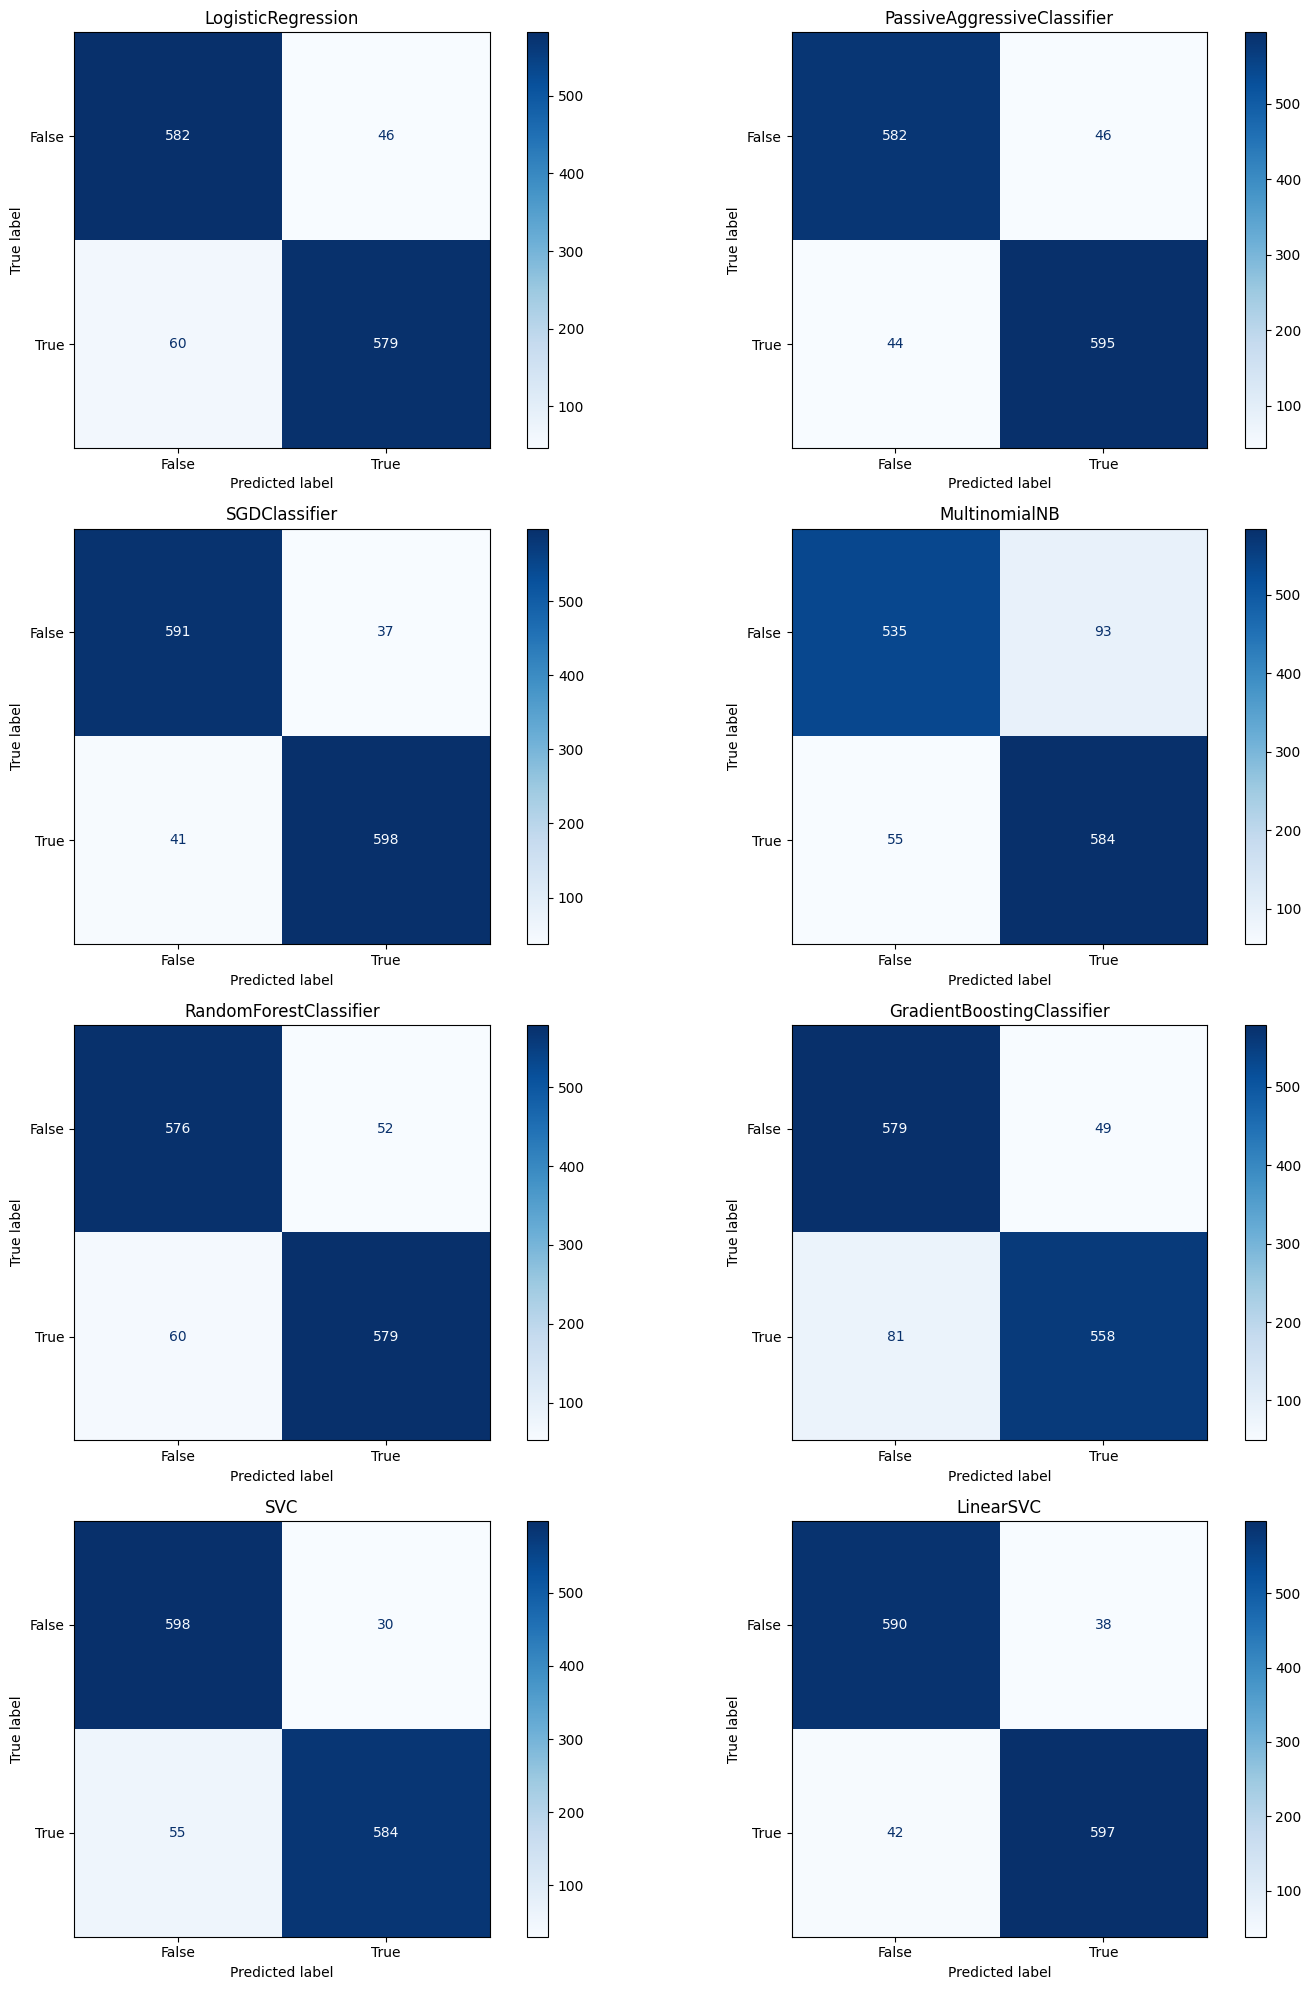

In [19]:

# Plot confusion matrices
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()


In [20]:
# 1. Split into Train (60%), Validation (20%), Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 x 0.8 = 0.2

# 2. Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# 3. Vectorize text (fit on train, transform on val/test)
vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)


In [21]:
def evaluate_on_all_sets(model, X_train, X_val, X_test, y_train, y_val, y_test):
    results = {}

    model.fit(X_train, y_train)

    for split_name, X_split, y_split in [
        ("Train", X_train, y_train),
        ("Validation", X_val, y_val),
        ("Test", X_test, y_test),
    ]:
        y_pred = model.predict(X_split)
        results[split_name] = {
            "Accuracy": accuracy_score(y_split, y_pred),
            "Precision": precision_score(y_split, y_pred, average='binary'),
            "Recall": recall_score(y_split, y_pred, average='binary'),
            "F1 Score": f1_score(y_split, y_pred, average='binary')
        }

    return results


In [22]:
for name, model in models.items():
    print(f"\n🔍 Evaluating model: {name}")
    results = evaluate_on_all_sets(model, X_train_vec, X_val_vec, X_test_vec, y_train, y_val, y_test)
    for split in results:
        print(f"{split} - Acc: {results[split]['Accuracy']:.3f}, "
              f"Prec: {results[split]['Precision']:.3f}, "
              f"Rec: {results[split]['Recall']:.3f}, "
              f"F1: {results[split]['F1 Score']:.3f}")



🔍 Evaluating model: LogisticRegression
Train - Acc: 0.949, Prec: 0.964, Rec: 0.934, F1: 0.949
Validation - Acc: 0.916, Prec: 0.940, Rec: 0.888, F1: 0.913
Test - Acc: 0.905, Prec: 0.936, Rec: 0.871, F1: 0.902

🔍 Evaluating model: PassiveAggressiveClassifier
Train - Acc: 1.000, Prec: 1.000, Rec: 1.000, F1: 1.000
Validation - Acc: 0.929, Prec: 0.940, Rec: 0.916, F1: 0.928
Test - Acc: 0.931, Prec: 0.933, Rec: 0.929, F1: 0.931

🔍 Evaluating model: SGDClassifier
Train - Acc: 0.998, Prec: 0.998, Rec: 0.998, F1: 0.998
Validation - Acc: 0.929, Prec: 0.939, Rec: 0.918, F1: 0.928
Test - Acc: 0.933, Prec: 0.938, Rec: 0.927, F1: 0.933

🔍 Evaluating model: MultinomialNB
Train - Acc: 0.914, Prec: 0.893, Rec: 0.941, F1: 0.917
Validation - Acc: 0.881, Prec: 0.854, Rec: 0.920, F1: 0.885
Test - Acc: 0.878, Prec: 0.857, Rec: 0.907, F1: 0.881

🔍 Evaluating model: RandomForestClassifier
Train - Acc: 1.000, Prec: 1.000, Rec: 0.999, F1: 1.000
Validation - Acc: 0.911, Prec: 0.913, Rec: 0.909, F1: 0.911
Test -

In [23]:
# Store results in list of DataFrames
all_results = []

for name, model in models.items():
    results = evaluate_on_all_sets(model, X_train_vec, X_val_vec, X_test_vec, y_train, y_val, y_test)
    
    # Flatten the results for each model
    model_data = {
        "Model": name,
        "Train Accuracy": results["Train"]["Accuracy"],
        "Train Precision": results["Train"]["Precision"],
        "Train Recall": results["Train"]["Recall"],
        "Train F1": results["Train"]["F1 Score"],
        "Val Accuracy": results["Validation"]["Accuracy"],
        "Val Precision": results["Validation"]["Precision"],
        "Val Recall": results["Validation"]["Recall"],
        "Val F1": results["Validation"]["F1 Score"],
        "Test Accuracy": results["Test"]["Accuracy"],
        "Test Precision": results["Test"]["Precision"],
        "Test Recall": results["Test"]["Recall"],
        "Test F1": results["Test"]["F1 Score"],
    }
    
    all_results.append(model_data)

# Create DataFrame
results_df = pd.DataFrame(all_results)

# Sort by highest Test F1 Score
results_df = results_df.sort_values(by="Test F1", ascending=False)

# Display the table
results_df.round(3)

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Val Accuracy,Val Precision,Val Recall,Val F1,Test Accuracy,Test Precision,Test Recall,Test F1
2,SGDClassifier,0.998,0.998,0.998,0.998,0.927,0.938,0.913,0.926,0.936,0.944,0.927,0.936
7,LinearSVC,0.998,0.998,0.998,0.998,0.933,0.949,0.915,0.932,0.931,0.940,0.921,0.931
6,SVC,0.997,0.996,0.997,0.997,0.931,0.957,0.904,0.929,0.928,0.947,0.907,0.927
1,PassiveAggressiveClassifier,1.000,1.000,1.000,1.000,0.930,0.936,0.923,0.929,0.927,0.929,0.924,0.926
4,RandomForestClassifier,1.000,1.000,1.000,1.000,0.901,0.907,0.894,0.901,0.903,0.909,0.896,0.902
0,LogisticRegression,0.949,0.964,0.934,0.949,0.916,0.940,0.888,0.913,0.905,0.936,0.871,0.902
3,MultinomialNB,0.914,0.893,0.941,0.917,0.881,0.854,0.920,0.885,0.878,0.857,0.907,0.881
5,GradientBoostingClassifier,0.943,0.964,0.921,0.942,0.897,0.921,0.869,0.894,0.882,0.902,0.858,0.880


In [24]:
from sklearn.linear_model import SGDClassifier

# Re-train on the full train + val set for final model (optional but recommended)
X_final = vectorizer.fit_transform(pd.concat([X_train, X_val]))
y_final = np.concatenate([y_train, y_val])

final_model = SGDClassifier()
final_model.fit(X_final, y_final)


SGDClassifier()

In [25]:
import pickle

# Save model
with open('sgd_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)


In [26]:
# Load model
with open('sgd_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    loaded_vectorizer = pickle.load(vec_file)

# Example: Predict
sample_text = ["Breaking: World leaders meet to discuss AI safety."]
cleaned = preprocess_pipeline(sample_text[0])
transformed = loaded_vectorizer.transform([cleaned])
prediction = loaded_model.predict(transformed)
print("Predicted label:", prediction)


Predicted label: [0]


In [27]:
decoded_label = le.inverse_transform([0])
print("Original label:", decoded_label[0])

Original label: FAKE


In [41]:
def predict_label(text, model, vectorizer, label_encoder):
    cleaned = preprocess_pipeline(text)
    transformed = vectorizer.transform([cleaned])
    pred_num = model.predict(transformed)
    pred_label = label_encoder.inverse_transform(pred_num)
    return pred_label[0]

# Example usage
label = predict_label(" Gauteng residents: In Pretoria, Saturday will start off with icy air drifting in from the southeast. The early morning minimum is forecast to hit a chilly four degrees Celsius. The day will gradually warm, but only reach a modest high of sixteen degrees in the afternoon. ",
                      loaded_model, loaded_vectorizer, le)
print("Predicted label:", label)


Predicted label: FAKE
